# Linear Regression

Here we will examine if we can predict the price of a houses in Iowa given some of the house features.

## Loading the data

Read the data file into a Pandas DataFrame called `home_data`.

In [1]:
import pandas as pd

# Path of the file to read
data_path = "data/train.csv"
home_data = pd.read_csv(data_path)

print("Setup Complete")
home_data.head()

Setup Complete


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We will select the **features** which by convention are called **X**. We will also choose the target variable which we typically call `y`.

In [2]:
feature_names = ['1stFlrSF']
X = home_data[feature_names]
y = home_data["SalePrice"]

We create the linear model.

In [3]:
# do the right imports
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# Fit the model
model.fit(X,y)

LinearRegression()

and we do the predictions:

In [4]:
predictions = model.predict(X)
print(predictions)

[142745.979416   193293.23203759 150714.01923813 ... 184080.18599326
 170385.11754899 192546.22830427]


and we can plot the data and the regression.

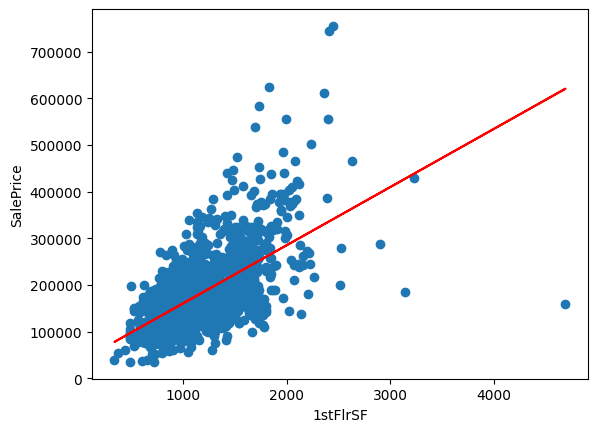

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X.iloc[:,0], y)
plt.plot(X.iloc[:,0], predictions, 'r')
plt.xlabel(X.columns[0])
plt.ylabel('SalePrice')
plt.show()

How much is the model's $MAE$ and $R^2$ ?

In [6]:
from sklearn.metrics import mean_absolute_error, r2_score

predicted_home_prices = model.predict(X)
mae = mean_absolute_error(y, predicted_home_prices)
r2 = r2_score(y, predicted_home_prices)

print("MAE %.2f" % mae)
print("R^2 %.2f" % r2)

MAE 46242.07
R^2 0.37


In [7]:
%reset

# Exercises

Now it's your turn! Make 2 linear regressions:

    A. Between on the columns `OverallQual` and  the `SalePrice`.
    B. Between `FullBath` and  the `SalePrice`.
    
<br>
**Which has the lowest MAE and $R^2$?**


## Step 0: We load the dataset and the necessary files

In [8]:
# import pandas
import pandas as pd 

# change to GET THE RAW FILE FROM GITHUB. WILL PROVIDE...
data_path = "data/train.csv"

# read the file using pandas
home_data = pd.read_csv(data_path)

In [9]:
# how many observations we have? Hint: use the `shape` attribute
# how many columns are there?

print("Number of observations", home_data.shape)
print("Number of dimensions", home_data.shape[1])


Number of observations (1460, 81)
Number of dimensions 81


In [10]:
df = home_data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000




## Step 1: Specify Prediction Target
Select the target variable (what we want to predict), which corresponds to the **sales price**. Save this to a new variable called `y`. You'll need to print a list of the columns to find the name of the column you need.

In [11]:
# print the list of columns in the dataset to find the name of the prediction target
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
# store in y the column with the target variable
y = df['SalePrice']

## Step 2: Create X
Now you will create a DataFrame called **`X`** holding the predictive features.

Since you want only some columns from the original data, you'll first create a list with the names of the columns you want in `X`.

There are a number of numerical columns that you can use:
 * LotArea
  * YearBuilt
  * 1stFlrSF
  * 2ndFlrSF
  * FullBath
  * BedroomAbvGr
  * TotRmsAbvGrd
  * OverallQual

However, for now just use either `FullBath` or `OverallQual`.

After you've created that list of features, use it to create the DataFrame that you'll use to fit the model.

In [13]:
# Create the list of features below
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'OverallQual']

# select data corresponding to features in feature_names
X = df[feature_names]

## Review Data
Before building a model, take a quick look at **X** to verify it looks sensible

In [14]:
# Review data
# print description or statistics from X
X.describe()


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,OverallQual
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808,6.099315
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393,1.382997
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000,10.000000


## Step 3: Specify and Fit Model
Create a `LinearRegression` model and save it iowa_model. Ensure you've done the relevant import from sklearn to run this command.

Then fit the model you just created using the data in `X` and `y` that you saved above.

In [15]:
# do the right imports
from sklearn.linear_model import LinearRegression

# create the model
iowa_model = LinearRegression()

# Fit the model
iowa_model.fit(X,y)


LinearRegression()

Which are the **parameters** of the model?

In [16]:
print(f'intercept = {iowa_model.intercept_}')
print(f'coefficients = {iowa_model.coef_}')

intercept = -988475.8539378349
coefficients = [ 7.07913943e-01  4.67680449e+02  8.02521068e+01  5.33219075e+01
 -4.48066453e+03 -1.07425885e+04  3.88591811e+03  2.30683164e+04]


## Step 4: Make Predictions

Make predictions with the model's `predict` command using `X` as the data. Save the results to a variable called `predictions`.

In [17]:
predictions = iowa_model.predict(X)
print(predictions)

[219879.13523626 164271.15791366 218930.09488553 ... 226978.98993448
 125696.92304795 140296.07543265]


## Show the regression

Now show the regression.

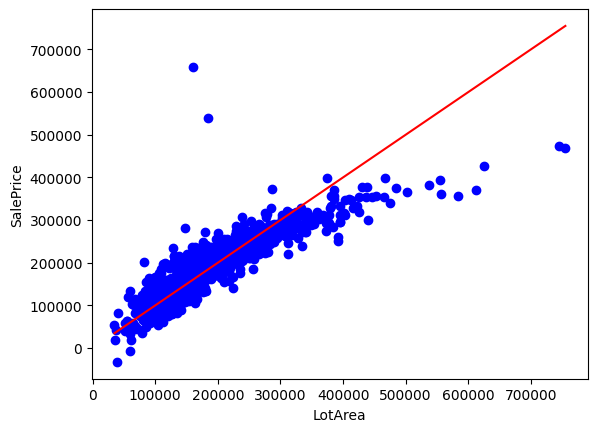

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(y, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r')
plt.xlabel(X.columns[0])
plt.ylabel('SalePrice')
plt.show()

## Model Validation

You've built a model. But how good is it?

The prediction error for each house is:  `error=|actual−predicted|`

So, if a house cost CHF 150'000 and you predicted it would cost CHF 100'000 the error is  CHF 50'000.

We call this **MAE** (Mean Average Error) and to get a single number we can average the errors for all the houses.

### Compute the MAE and the $R^2$ of the two models.

For which feature
   - FullBath
   - OverQual

do we have the lowest MAE?

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

predicted_home_prices = iowa_model.predict(X)
mae = mean_absolute_error(y, predicted_home_prices)
r2 = r2_score(y, predicted_home_prices)

print("MAE %.2f" % mae)
print("R^2 %.2f" % r2)

MAE 24295.05
R^2 0.77


So, on average we are off by some CHF 30k-46k on the predicted price. But this is for the "in-sample" points.

However, in practice **should always** evaluate the quality of our model on datapoints that were not used to create the model. We will see how this can be done later.

# Exercise on Train/Test Split

## Step 1: Split Your Data
Use the `train_test_split` function to split up your data.

Give it the argument `random_state=1` so the `check` functions know what to expect when verifying your code.

Recall, your features are loaded in the DataFrame **X** and your target is loaded in **y**.

In [20]:
# Import the train_test_split function and uncomment
from sklearn.model_selection import train_test_split

# fill in and uncomment
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)

In [21]:
# Import the train_test_split function and uncomment
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

## Step 2: Specify and Fit the Model

Create a `LinearRegression` model and fit it to the relevant data.

In [22]:
# Specify the model
iowa_model = LinearRegression()

# Fit the model with the *TRAINING* data
iowa_model.fit(train_X, train_y)

LinearRegression()

## Step 3: Make Predictions with Validation data


In [23]:
# Predict with all validation observations
val_predictions = iowa_model.predict(val_X)


In [24]:
val_predictions = iowa_model.predict(val_X)

## Step 4: Calculate the Mean Absolute Error in Validation Data

In [25]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y, val_predictions)

# uncomment following line to see the validation_mae
print(val_mae)


23645.954644033955


In [26]:
val_mae = mean_absolute_error(val_predictions, val_y)
print(val_mae)

23645.954644033955


So we can see that before the MAE was ~46000 and now it is ~47000. It has increased which is what we expected.

# Comparing Models of Different "Complexity"


In [27]:
def model_mae(train_X, val_X, train_y, val_y):
    """
    Computes the MAE for a DataFrame
    """
    model = LinearRegression()
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

Let's see which are the attributes that are most correlated with the SalePrice.

In [28]:
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'OverallQual',
'OverallCond', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',  'SalePrice']

# select data corresponding to features in feature_names
home_data = pd.read_csv(data_path)
df1 = home_data[feature_names]
corr = df1.corr().iloc[:-1,-1].to_frame() #just correlation of last column to rest
styled_corr = corr.style.background_gradient(cmap='coolwarm').format("{:.4f}")
styled_corr


,SalePrice
LotArea,0.2638
YearBuilt,0.5229
1stFlrSF,0.6059
2ndFlrSF,0.3193
FullBath,0.5607
BedroomAbvGr,0.1682
TotRmsAbvGrd,0.5337
OverallQual,0.7910
OverallCond,-0.0779
KitchenAbvGr,-0.1359


In [30]:
# let's put them in decreasing order of correlation
feature_names = ['OverallQual', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'TotRmsAbvGrd', 'YearBuilt', '2ndFlrSF',  'WoodDeckSF',  'OpenPorchSF', 'LotArea', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', '3SsnPorch']

X = home_data[feature_names]
y = home_data["SalePrice"]

#split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

for numfeatures in range(1,len(feature_names)+1):

    #select the first numfeatures
    train_X_new = train_X.iloc[:,0:numfeatures]
    val_X_new = val_X.iloc[:,0:numfeatures]

    mae_test = model_mae(train_X_new, val_X_new, train_y, val_y)
    mae_train = model_mae(train_X_new, train_X_new, train_y, train_y)

    print("Number of features:%d \t MAE - test:%.2f \t MAE - train:%.2f" % (numfeatures, mae_test, mae_train))

Number of features:1 	 MAE - test:31935.50 	 MAE - train:34190.91
Number of features:2 	 MAE - test:29733.66 	 MAE - train:30297.92
Number of features:3 	 MAE - test:29080.38 	 MAE - train:29493.53
Number of features:4 	 MAE - test:27883.46 	 MAE - train:28543.82
Number of features:5 	 MAE - test:27883.46 	 MAE - train:28543.82
Number of features:6 	 MAE - test:27105.95 	 MAE - train:27415.74
Number of features:7 	 MAE - test:24762.12 	 MAE - train:25579.53
Number of features:8 	 MAE - test:24494.40 	 MAE - train:25119.03
Number of features:9 	 MAE - test:24521.96 	 MAE - train:25029.03
Number of features:10 	 MAE - test:24199.52 	 MAE - train:24427.43
Number of features:11 	 MAE - test:23598.35 	 MAE - train:24337.18
Number of features:12 	 MAE - test:23712.03 	 MAE - train:24285.12
Number of features:13 	 MAE - test:24125.12 	 MAE - train:24345.66
Number of features:14 	 MAE - test:24058.95 	 MAE - train:24370.44
